In [ ]:
import numpy as np  # linear algebra
import cv2 # opencv
import matplotlib.pyplot as plt # image plotting
# keras
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load train and test set
train_dir = "/content/drive/MyDrive/Mask dataset/Train"
test_dir = "/content/drive/MyDrive/Mask dataset/Test"
val_dir = "/content/drive/MyDrive/Mask dataset/Validation"

In [ ]:
img = cv2.imread("/content/maksssksksss352.png")
orig_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image

# Convert image to grayscale
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(12, 12))

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

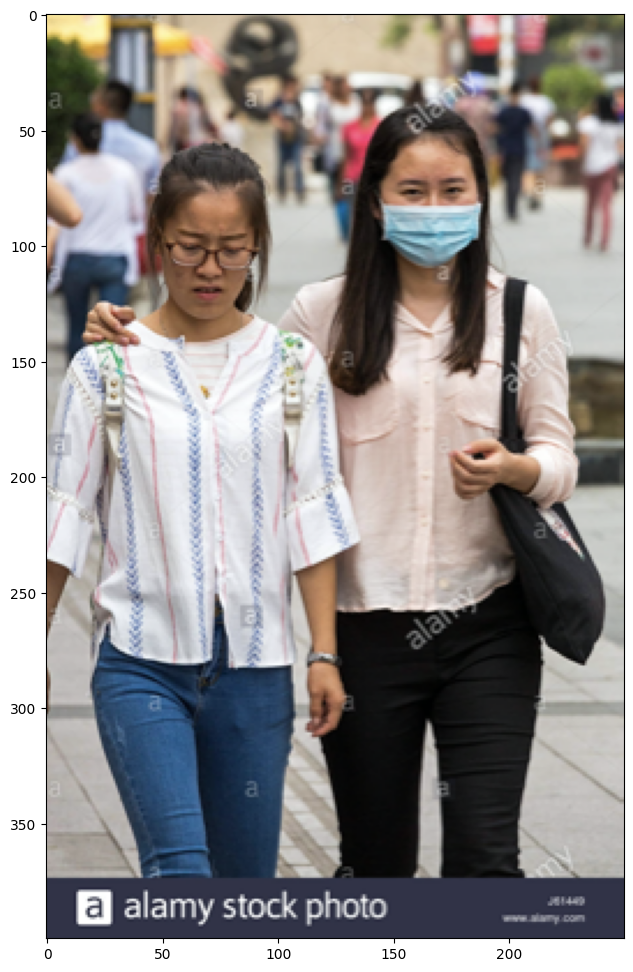

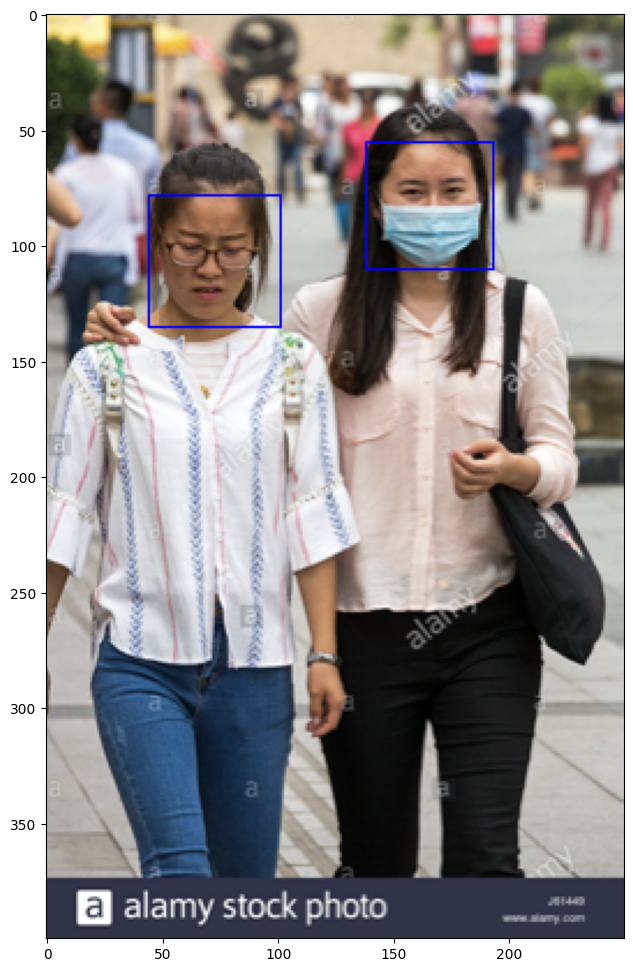

In [ ]:
# Read a sample image
img = cv2.imread("/content/maksssksksss352.png")

# Keep a copy of coloured image
orig_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # colored output image
plt.figure(figsize=(12, 12))
plt.imshow(orig_img)

# Convert image to grayscale
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)


# loading haarcascade_frontalface_default.xml
face_detection_model = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

# detect faces in the given image
return_faces = face_detection_model.detectMultiScale(
    img, scaleFactor=1.08, minNeighbors=4
)  # returns a list of (x,y,w,h) tuples

# plotting the returned values
for (x, y, w, h) in return_faces:
    cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 0, 255), 1)

plt.figure(figsize=(12, 12))
plt.imshow(orig_img)  # display the image

In [ ]:
# Data preprocessing
# Train data
datagenerator = ImageDataGenerator(
    rescale=1.0 / 255, horizontal_flip=True, zoom_range=0.2, shear_range=0.2
)
train_generator = datagenerator.flow_from_directory(
    directory=train_dir, target_size=(128, 128), class_mode="categorical", batch_size=32
)

# Validation data
val_generator = datagenerator.flow_from_directory(
    directory=val_dir, target_size=(128, 128), class_mode="categorical", batch_size=32
)

# Test data
test_generator = datagenerator.flow_from_directory(
    directory=val_dir, target_size=(128, 128), class_mode="categorical", batch_size=32
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
# Initializing the VGG19 model
vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

for layer in vgg19_model.layers:
    layer.trainable = False

# Initialize a sequential model
model = Sequential()
model.add(vgg19_model)
model.add(Flatten())
model.add(Dense(2, activation="sigmoid"))
model.summary()

# Compiling the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 2)                 16386     
                                                                 
Total params: 20040770 (76.45 MB)
Trainable params: 16386 (64.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model_history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)


<ipython-input-20-0da647821182>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/20
313/313 [==============================] - 1650s 5s/step - loss: 0.0632 - accuracy: 0.9786 - val_loss: 0.0272 - val_accuracy: 0.9975
Epoch 2/20
313/313 [==============================] - 85s 272ms/step - loss: 0.0373 - accuracy: 0.9871 - val_loss: 0.0270 - val_accuracy: 0.9900
Epoch 3/20
313/313 [==============================] - 83s 267ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0224 - val_accuracy: 0.9937
Epoch 4/20
313/313 [==============================] - 80s 257ms/step - loss: 0.0256 - accuracy: 0.9887 - val_loss: 0.0172 - val_accuracy: 0.9962
Epoch 5/20
313/313 [==============================] - 80s 257ms/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.0122 - val_accuracy: 0.9962
Epoch 6/20
313/313 [==============================] - 84s 267ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 7/20
313/313 [==============================] - 80s 257ms/step - loss: 0.0165 - accuracy: 0.9944 - val_loss: 0.0080 - val_acc

In [ ]:
print(len(train_generator))

313


In [ ]:
# Evaluate model performance on test data
model_loss, model_acc = model.evaluate(test_generator)
print("Model has a loss of %.2f and accuracy %.2f%%" % (model_loss, model_acc*100))

25/25 [==============================] - 5s 210ms/step - loss: 0.0101 - accuracy: 0.9962
Model has a loss of 0.01 and accuracy 99.62%


In [ ]:
model.save('/content/drive/MyDrive/Mask dataset/saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
